In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
from statistics import mean

class LogisticRegression:
    """Logistic Regression with Gradient Descent's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self, step_size=0.1, max_iter=30, eps=1e-2,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta_0 = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose
  

    def fit(self, x, y):
        """Run Gradient Descent's Method to minimize J(theta) for Logistic Regression.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***

        n = x.shape[0]
        # By convention, we add a column full of 1 to x, to make sure to work with a bias
        x["extra"] = [1 for i in range(n)]
        p = x.shape[1]

        # x is a single individual
        def h(self, x_i):
          return 1/(1 + np.exp(-np.dot(x_i, self.theta_0)))
    
        def J(self, x, y):
          return -np.mean([y[i]*log(h(self,x.iloc[i,:])) + (1-y[i])*log(1-h(self,x.iloc[i,:])) for i in range(n)])


        # Gradient of the log-likelihood
        def J_gradient(self, x, y):
          return np.array([-mean([x.iloc[i,j]*(y[i] - h(self, x.iloc[i,:])) for i in range(n)]) for j in range(p)])

        # Hessian of the log-likelihood
        def J_hessian(self, x, y):
          hessian = np.array([[0 for u in range(p)] for v in range(p)])
          for u in range(p):
            for v in range(p):
              hessian[u,v] = mean([x.iloc[i,u]*x.iloc[i,v]*h(self,x.iloc[i,:])*(1-h(self,x.iloc[i,:])) for i in range(n)])
          return hessian


        # Initial values of the weights
        if self.theta_0 is None:
          # the third 0 codes for the bias
          self.theta_0 = np.array([0.1,0.1,0.1])

        # Compteur d'itérations
        c = 0

        # Loop for training the model
        while np.linalg.norm(J_gradient(self, x, y)) > self.eps and c < self.max_iter:
          self.theta_0 = np.array([self.theta_0[j] - self.step_size*J_gradient(self, x, y)[j] for j in range(p)])
          if self.verbose == True:
            print("Epoch: ", c+1 ,"   Value of loss function: ", J(self, x, y))
          c += 1
        # *** END CODE HERE ***



    def predict(self, x):
        """Return predicted probabilities given new inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        # *** START CODE HERE ***

        return 1/(1 + np.exp(-np.dot(x,self.theta_0[:-1]) - self.theta_0[-1]))

        # *** END CODE HERE ***


In [161]:
import pandas as pd

df1_train = pd.read_csv("ds1_train.csv")

X1_train = df1_train[["x_1","x_2"]]
y1_train = df1_train["y"]

df1_test = pd.read_csv("ds1_test.csv")

X1_test = df1_test[["x_1","x_2"]]
y1_test = df1_test["y"]

In [162]:
X1_train.head()

x_1       x_2
0  0.411809  1.105525
1  1.274746  6.303314
2  0.115488  3.264251
3 -0.486306  0.279487
4  0.257625  1.212389

In [179]:
logit1 = LogisticRegression()

In [180]:
logit1.fit(X1_train,y1_train)

Epoch:  7    Value of loss function:  0.5779901177375664


KeyboardInterrupt: ignored

In [166]:
def plot_dist(X, classes, title, alpha=0.7):
  fig = plt.figure(figsize=(10,10))
  plt.scatter(X.iloc[np.array(classes)==0,0], X.iloc[np.array(classes)==0,1], alpha=alpha, c = "red", label="class 0")
  plt.scatter(X.iloc[np.array(classes)==1,0], X.iloc[np.array(classes)==1,1], alpha=alpha, c = "blue", label="class 1")
  plt.xlabel("x_1")
  plt.xlabel("x_2")
  plt.title(title)
  plt.legend()
  plt.plot()

In [ ]:
preds1 = [round(x) for x in logit1.predict(X1_test)]

plot_dist(X1_test, preds1, title="Classification of the testing set ds1_test by the Logistic Regression model")
#plt.savefig("logit1")

## Dataset 2

In [147]:
df2_train = pd.read_csv("ds2_train.csv")

X2_train = df2_train[["x_1","x_2"]]
y2_train = df2_train["y"]

df2_test = pd.read_csv("ds2_test.csv")

X2_test = df2_test[["x_1","x_2"]]
y2_test = df2_test["y"]

In [ ]:
logit2 = LogisticRegression()
logit2.fit(X2_train,y2_train)

In [173]:
preds2 = [round(x) for x in logit2.predict(X2_test)]

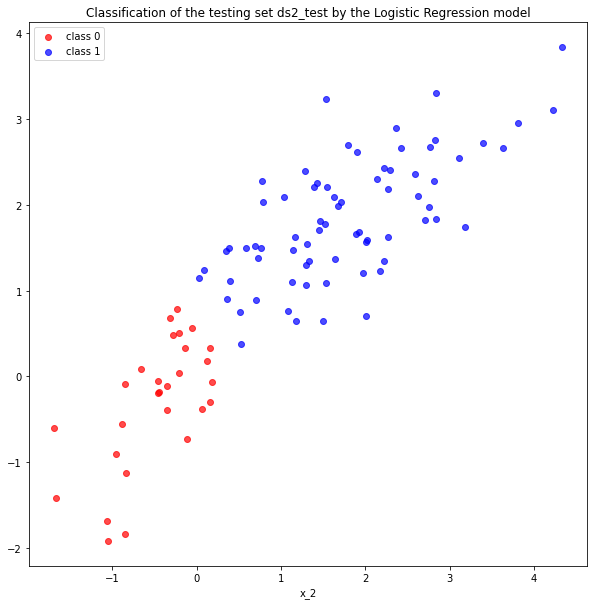

In [176]:
plot_dist(X2_test, preds2, title="Classification of the testing set ds2_test by the Logistic Regression model")
#plt.savefig("logit2")